In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import shapely.geometry

In [6]:
import shapely.wkt ##moduls.wkt --> well known text

In [7]:
import geopandas as gpd

In [8]:
###spatial data

In [9]:
##wkt weil string in der Klammer also wkt, bei Point, Linestring 1 Klammer, bei Polygon, Multipoint und Multitstring 2

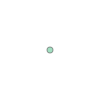

In [10]:
point = shapely.wkt.loads('POINT (0 -1)')
point

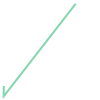

In [11]:
line = shapely.wkt.loads('LINESTRING (0 0, 0 -1, 7 8)')
line

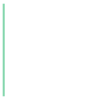

In [12]:
line = shapely.wkt.loads('LINESTRING (0 0, 0 -1)')
line

In [13]:
##polygon is closed line --> also am Anfang und am Ende die gleiche Ziffern, zumindest bei wkt

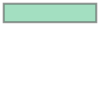

In [14]:
pol= shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
pol

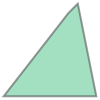

In [15]:
pol1= shapely.wkt.loads('POLYGON ((0 0, 7 9, 8 10, 10 0, 0 0))')
pol1

In [16]:
##several values in der Klammer, wenn die Klammer weg fällt dann hat man eine Linie 
##collection of points, weil sring deswegen wkt

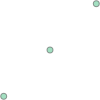

In [17]:
multipoint = shapely.wkt.loads('MULTIPOINT ((0 0), (1 1), (2 2))')
multipoint

In [18]:
##??wieso gehen beide Varianten

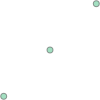

In [19]:
multipoint1 = shapely.wkt.loads('MULTIPOINT (0 0, 1 1, 2 2)')
multipoint1

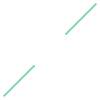

In [20]:
multilinestring = shapely.wkt.loads('MULTILINESTRING ((0 0, 1 1), (2 2, 3 3))')
multilinestring

In [21]:
##3 Klammern, weil 2 Polygone

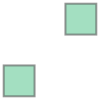

In [22]:
multipolygon = shapely.wkt.loads('MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0)), ((2 2, 2 3, 3 3, 3 2, 2 2)))')
multipolygon

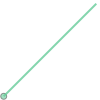

In [23]:
collection = shapely.wkt.loads('GEOMETRYCOLLECTION (POINT (1 2), LINESTRING (1 2, 3 4))')
collection

Exercise 1: Create a GeometryCollection with a MultiPoint, a MultiLineString, and a MultiPolygon using shapely.wkt.loads

In [28]:
collection1 = shapely.wkt.loads('GEOMETRYCOLLECTION (MULTIPOINT ((0 0), (1 1), (2 2)), MULTILINESTRING ((0 0, 1 1), (2 2, 3 3)), 
                                MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0)), ((2 2, 2 3, 3 3, 3 2, 2 2))))')
collection1

SyntaxError: unterminated string literal (detected at line 1) (4192408644.py, line 1)

In [29]:
##geometry.Point Funktion, kein String, sondern direkt eine Funktion 

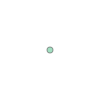

In [30]:
point2 = shapely.geometry.Point((1,4))
point2

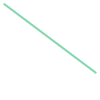

In [31]:
geometric = [(1,2), (-3,5)]
line2 = shapely.geometry.LineString(geometric)
line2

Exercise 2: create a MultiLineString using shapely.geometry.MultiLineString

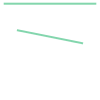

In [32]:
Linie_1 = [(4,5), (-3,5)]
Linie_2 = [(3,2), (-2,3)]
Multi_Linie = shapely.geometry.MultiLineString([Linie_1, Linie_2])
Multi_Linie

In [33]:
##kombinieren beider Methoden


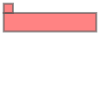

In [34]:
pol = shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
coordinates = [(0, 0), (0, 1), (1, 1), (1, 0)]
pol2 = shapely.geometry.Polygon(coordinates)
shapely.geometry.MultiPolygon([pol,pol2])

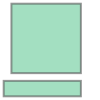

In [35]:
pol = shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
coordinates = [(10, 10), (10, 1), (1, 1), (1, 10)]
pol2 = shapely.geometry.Polygon(coordinates)
shapely.geometry.MultiPolygon([pol,pol2])

In [36]:
##effizienteste Methode dictionary erstellen, Achtung Eckige Klammer und geschweifte Klammer

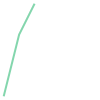

In [37]:
line3 = {"type": "LineString", "coordinates": [(0, 0), (1, 4), (2, 6)]}
line3 = shapely.geometry.shape(line3)
line3

In [38]:
##i shapely. muss kein kreis sein, fügt selber dazu
##??hierzu nochmal ihre Lösung überprüfen, ob sie die Sachen auch so nennet wie bei der Collection?

In [39]:
Multipoint = {"type": "MultiPoint", "coordinates": [(0, 0), (1, 4), (2, 6)]}
Multipoint = shapely.geometry.shape(Multipoint)
Multipoint

MultiLineString = {"type": "MultiLineString", "coordinates": [[(0, 0), (1, 4)], [(2, 6),(4, 5)]]}
MultiLineString = shapely.geometry.shape(MultiLineString)
MultiLineString


poly_coords1 = [[(0, 0), (0, 1), (1, 1), (1, 0)]]
poly_coords2 = [[(0, 0), (0, 1), (1, 1), (1, 0)]]

MultiPolygon = {"type": "MultiPolygon", "coordinates": [poly_coords1, poly_coords2]}
MultiPolygon

geom_collection = {'type': 'GeometryCollection', 'geometries':[Multipoint, MultiLineString, MultiPolygon]}

geometry = shapely.geometry.shape(geom_collection)
print(geometry)

GEOMETRYCOLLECTION (MULTIPOINT (0 0, 1 4, 2 6), MULTILINESTRING ((0 0, 1 4), (2 6, 4 5)), MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0)), ((0 0, 0 1, 1 1, 1 0, 0 0))))


In [40]:
##nach typ fragen

In [41]:
point.geom_type

'Point'

In [42]:
point.coords

In [43]:
##liste der koordinaten ausgeben

In [44]:
list(point.coords)

[(0.0, -1.0)]

Exercise 4: create a LineString using shapely.geometry.LineString and check for its type and coordinate

In [45]:
geometric = [(1,2), (-3,5)]
Linestring1 = shapely.geometry.LineString(geometric)
Linestring1

print(Linestring1.geom_type)
list(Linestring1.coords)

LineString


[(1.0, 2.0), (-3.0, 5.0)]

In [46]:
##shapely is undefined coordinate syrsem  --> from the first feature coordinates deswegen die 0 in der Klammer

In [47]:
line1 = [(0, 0), (1, 1), (2, 2)]
line2 = [(3, 3), (4, 4), (5, 5)]
multi_line = shapely.geometry.MultiLineString([line1, line2])
multi_line
list(multi_line.geoms[0].coords)

[(0.0, 0.0), (1.0, 1.0), (2.0, 2.0)]

In [48]:
list(multi_line.geoms[1].coords)

[(3.0, 3.0), (4.0, 4.0), (5.0, 5.0)]

In [49]:
print(multi_line.geom_type)

MultiLineString


Exercise 5:create a MultiLineString with 3 lines with dict method and check for its type and coordinate

In [50]:
MultiLineString = {"type": "MultiLineString", "coordinates": [[(0, 0), (1, 4)], [(2, 6),(4, 5)], [(2,3),(4,5)]]}
MultiLineString = shapely.geometry.shape(MultiLineString)
MultiLineString
print(MultiLineString.geom_type)
list(MultiLineString.geoms[1].coords)

MultiLineString


[(2.0, 6.0), (4.0, 5.0)]

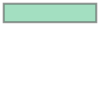

In [51]:
pol= shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
pol

In [52]:
##coordinates for exterior also nur für die Border, immer erst .exterior weil Koordinaten nur am Rand und nicht drinnen möglich
## .exterior

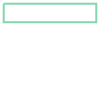

In [53]:
pol.exterior

In [54]:
list(pol.exterior.coords)

[(0.0, 0.0), (0.0, -2.0), (10.0, -2.0), (10.0, 0.0), (0.0, 0.0)]

In [55]:
pol = shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
coordinates = [(0, 0), (0, 1), (1, 1), (1, 0)]
pol2 = shapely.geometry.Polygon(coordinates)
pol3 = shapely.geometry.MultiPolygon([pol,pol2])

In [56]:
##von Polygon 1 das exterior

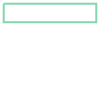

In [57]:
pol3.geoms[0].exterior

In [58]:
##von polygon 2 das exterior

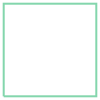

In [59]:
pol3.geoms[1].exterior

In [60]:
list(pol3.geoms[1].exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

Exercise 6:create a Multipolygon with 2 polygon, and 1 with one interior and check for its coordinates

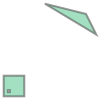

In [61]:
multipolygon = shapely.wkt.loads('MULTIPOLYGON (((40 40,20 45, 45 30, 40 40)),((0 0, 0 10, 10 10, 10 0, 0 0), (2 2, 2 3, 3 3, 3 2, 2 2)))')
multipolygon


In [62]:
##her solution

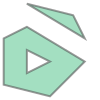

In [63]:
multipolygon= shapely.wkt.loads('''MULTIPOLYGON (((40 40,20 45, 45 30, 40 40)), ((20 35, 10 30, 10 10, 30 5, 45 20, 20 35),(30 20, 20 15, 20 25, 30 20)))''')
multipolygon

In [64]:
##interiors hier 0, weil nur einmal ein interiors, wenn ich mehrere habe, dann kann es auch 1 oder 2 sein 

In [65]:
list(multipolygon.geoms[1].interiors[0].coords)


[(30.0, 20.0), (20.0, 15.0), (20.0, 25.0), (30.0, 20.0)]

In [66]:
## Bounds   xmin,ymin    xmax,ymax

In [67]:
pol2.bounds

(0.0, 0.0, 1.0, 1.0)

In [68]:
point.bounds

(0.0, -1.0, 0.0, -1.0)

In [69]:
## Length  ## Length, ohne Einheit, weil kein Koordinatensystem

In [70]:
line.length

1.0

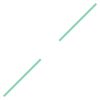

In [71]:
multi_line

In [72]:
multi_line.geoms[0].length

2.8284271247461903

In [73]:
multi_line.geoms[1].length

2.8284271247461903

In [74]:
## Area   (## Area, geht nur für Polygon)

In [75]:
pol.area

20.0

Exercise 7: calculate the length and area of the second polygon of multipolygon pol3

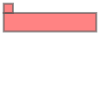

In [76]:
pol = shapely.wkt.loads('POLYGON ((0 0, 0 -2, 10 -2, 10 0, 0 0))')
coordinates = [(0, 0), (0, 1), (1, 1), (1, 0)]
pol2 = shapely.geometry.Polygon(coordinates)
pol3 = shapely.geometry.MultiPolygon([pol,pol2])
pol3

In [77]:
pol3.geoms[1].length

4.0

In [78]:
pol3.geoms[1].area


1.0

In [79]:
## New geometries

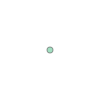

In [81]:
pol.centroid

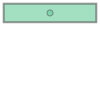

In [82]:
shapely.geometry.GeometryCollection([pol, pol.centroid])

In [ ]:
##new feature wird erstellt

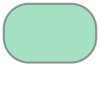

In [83]:
pol.buffer(6)

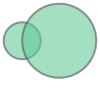

In [88]:
from shapely.geometry import Point, GeometryCollection

x = Point(0, 0).buffer(1)
a = Point(2, 0).buffer(2)

collection_n = GeometryCollection([x, a])
collection_n

In [ ]:
##new feature from two others feature

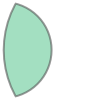

In [91]:
intersection = a.intersection(x)
intersection

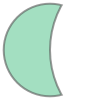

In [93]:
x.difference(a)

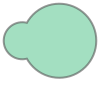

In [94]:
x.union(a)

In [ ]:
## vector layers

In [ ]:
## GeoSeries  ## import geopandas as gpd, crs= Koordinatensystem setzen

In [98]:
gs = gpd.GeoSeries([pol, pol2], crs=4326)
gs

0    POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1...
1    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
dtype: geometry

In [ ]:
## GeoDataFrame
##first part additional part
##second part the geometry is always the coordinate system

In [64]:
gd = {'id': ['x', 'y'], 'geometry': gs}
gd

{'id': ['x', 'y'],
 'geometry': 0    POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1...
 1    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
 dtype: geometry}

In [65]:
gd_df = gpd.GeoDataFrame(gd)
gd_df

,id,geometry
0,x,"POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1..."
1,y,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."


In [66]:
gd_df = gpd.GeoDataFrame({'id': ['x', 'y'], 'geometry': gs})
gd_df 

,id,geometry
0,x,"POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1..."
1,y,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."


In [ ]:
##combine the two steeps together also eher die Variante nehmen

In [67]:
gd_df = gpd.GeoDataFrame({'id': ['x', 'y'], 'geometry': [pol, pol2]}, crs=4326)
gd_df

,id,geometry
0,x,"POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1..."
1,y,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."


In [68]:
gd_df['id']

0    x
1    y
Name: id, dtype: object

In [69]:
gd_df['geometry']

0    POLYGON ((0.00000 0.00000, 0.00000 -2.00000, 1...
1    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
Name: geometry, dtype: geometry

In [70]:
type(gd_df['geometry'])

geopandas.geoseries.GeoSeries

In [71]:
type(gd_df['id'])

pandas.core.series.Series

Exercise 8: Use the iloc method to show the first polygon in gd_df

In [ ]:
##immer das noch in die Klammer dazu nehmen, zum anzeigen!


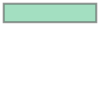

In [72]:
gd_df['geometry'].iloc[0]

In [73]:
gs.geom_type

0    Polygon
1    Polygon
dtype: object

In [74]:
gd_df.geom_type

0    Polygon
1    Polygon
dtype: object

In [ ]:
##Koordinatenreferenzsystm checken, fast immer WGS 84 wird verwendet

In [75]:
gd_df['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
gd_df.bounds

,minx,miny,maxx,maxy
0,0.0,-2.0,10.0,0.0
1,0.0,0.0,1.0,1.0


In [77]:
islands = gpd.read_file('ne_10m_minor_islands_coastline.shp', encoding='utf-8')
islands

,featurecla,min_zoom,scalerank,geometry
0,Minor coastline,6.5,7,"LINESTRING (168.20460 -76.06341, 168.28175 -76..."
1,Minor coastline,6.5,7,"LINESTRING (-68.70861 -56.52345, -68.70954 -56..."
2,Minor coastline,6.5,7,"LINESTRING (-68.70360 -56.51442, -68.71105 -56..."
3,Minor coastline,6.5,8,"LINESTRING (-59.20238 -52.90244, -59.19591 -52..."
4,Minor coastline,7.0,8,"LINESTRING (-74.53359 -52.45612, -74.50559 -52..."
...,...,...,...,...
2736,Minor coastline,7.0,8,"LINESTRING (172.05644 -22.39463, 172.05433 -22..."
2737,Minor coastline,7.0,8,"LINESTRING (171.34060 -22.34476, 171.33902 -22..."
2738,Minor coastline,7.0,8,"LINESTRING (117.75389 15.15437, 117.75186 15.1..."
2739,Minor coastline,6.5,7,"LINESTRING (43.14024 12.72015, 43.13857 12.718..."


In [78]:
islands['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

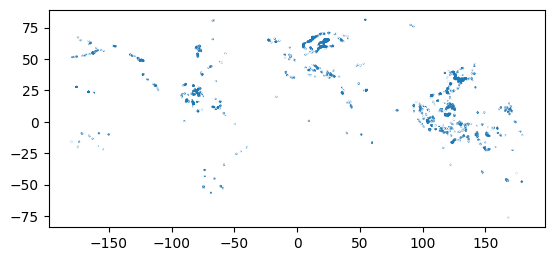

In [79]:
islands.plot();

Exercise 9: Use the scalerank column for an attribute-specific mapping, to show the colorbar you need, legend=True, add title and x and y label...

Reference: https://jupyter.org https://the-turing-way.netlify.app/communication/binder/zero-to-binder.html https://docs.python.org https://geobgu.xyz/py/ https://www.naturalearthdata.com/